<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# added some formatting for EDA
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 11

In [102]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [103]:
# concatenate X and y to do some initial EDA on data
boston = pd.concat([y,X], axis=1)

In [104]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

# see below

In [105]:
# identify header rows of dataset. there are 14 attributes.
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
# identify the dimension. there are 14 feature columns and 506 index rows.
boston.shape

(506, 14)

In [107]:
# identify all of the data types from the boston data.
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [108]:
# identify the index of the boston data
boston.index

RangeIndex(start=0, stop=506, step=1)

In [109]:
# check to see if there are any nulls in each of the datasets. it looks like there are zero nulls in the data.
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [110]:
# summary statistics of the data
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [111]:
# identify the number of unique values for each column
boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

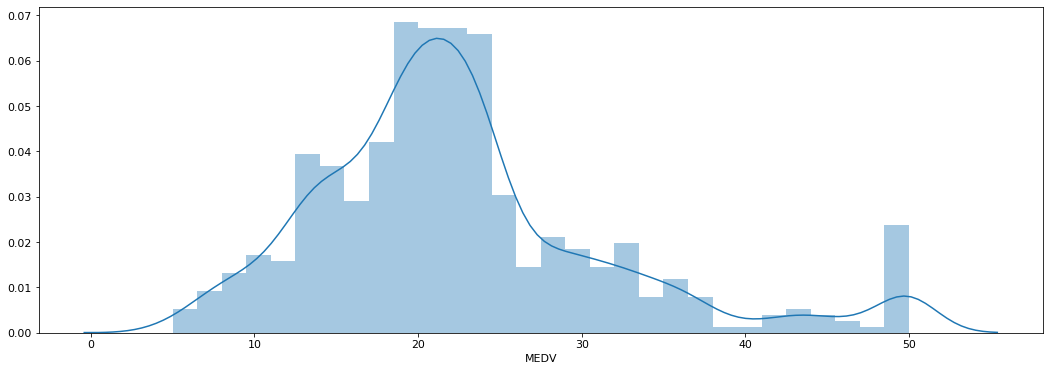

In [112]:
# plot the distribution of the target variable MEDV. looks like the MEDV is distributed normally with a few outliers
sns.distplot(boston['MEDV'], bins=30)
plt.show()

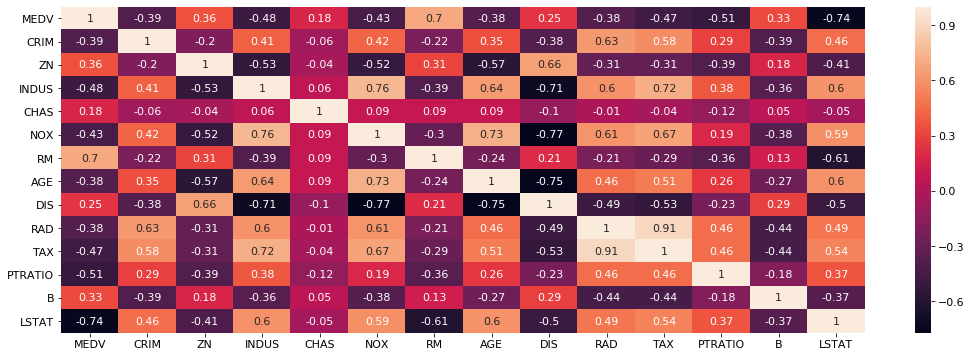

In [113]:
# create a correlation matrix to measure the linear relationships between the variables.
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [114]:
# create linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [115]:
# create feature matrix. based on the correlation matrix it looks like 'RM' and 'LSAT' have the highest correlation to the target variable. 
feature_cols = ['RM','LSTAT','PTRATIO', 'ZN']
X_model = X[feature_cols]

In [116]:
# fit linear regression model on feature matrix and y
lr.fit(X_model, y)
lr.score(X_model, y)

0.6789744677198571

,Feature,Coeff
0,RM,4.526442
1,LSTAT,-0.579749
2,PTRATIO,-0.955301
3,ZN,-0.008449


Model Score: 0.6789744677198571


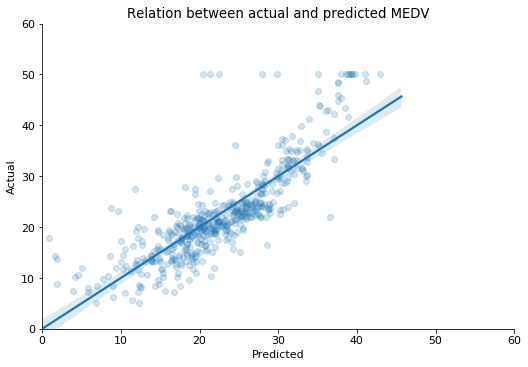

In [117]:
# predict y based on the model
y_pred = lr.predict(X_model)

# display predictor coefficients
display(pd.DataFrame({'Feature': (feature_cols), 'Coeff': (lr.coef_[0])}))

# R2 score of the model
print("Model Score: " + str(lr.score(X_model, y)))

# plot y predicted vs. actual to see model accuracy
sns.lmplot(x='Predicted', y='Actual', data=pd.DataFrame({'Actual': y.MEDV, 'Predicted': y_pred[:, 0]}), aspect=1.5, scatter_kws={'alpha':0.2});
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Relation between actual and predicted MEDV');
plt.xlim(0, 60);
plt.ylim(0, 60);

The scoring indicates that this model accounts for about 68% of the variability around the mean. Good to start with but will have to look for ways to increase the model's performance. 

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

,Feature,Coeff
0,RM,5.395834
1,LSTAT,-0.532880
2,PTRATIO,-0.978428
3,ZN,-0.011172


Model R2 Score: 0.6761207032210625


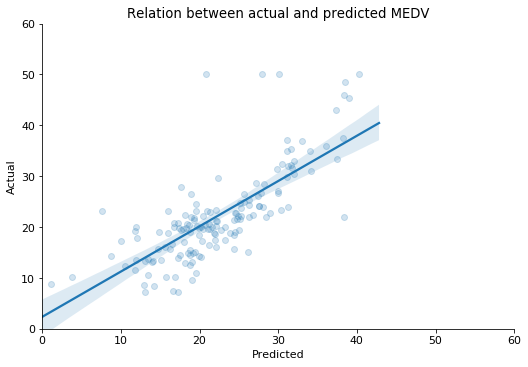

In [118]:
# print 70/30 train/test split results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_model, y, random_state=123, test_size = 0.3)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

display(pd.DataFrame({'Feature': (feature_cols), 'Coeff': (lr.coef_[0])}))

print("Model R2 Score: " + str(lr.score(X_model, y)))

sns.lmplot(x='Predicted', y='Actual', data=pd.DataFrame({'Actual': y_test.MEDV, 'Predicted': y_pred[:, 0]}), aspect=1.5, scatter_kws={'alpha':0.2});
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Relation between actual and predicted MEDV');
plt.xlim(0, 60);
plt.ylim(0, 60);

,Feature,Coeff
0,RM,4.790374
1,LSTAT,-0.542931
2,PTRATIO,-0.922632
3,ZN,-0.003469


Model R2 Score: 0.6782901328385086


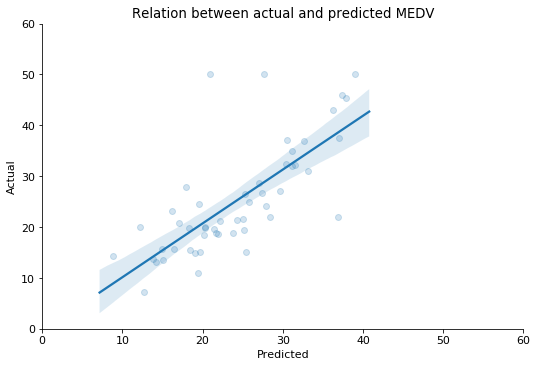

In [119]:
# print 90/10 train/test split results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_model, y, random_state=123, test_size = 0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

display(pd.DataFrame({'Feature': (feature_cols), 'Coeff': (lr.coef_[0])}))

print("Model R2 Score: " + str(lr.score(X_model, y)))

sns.lmplot(x='Predicted', y='Actual', data=pd.DataFrame({'Actual': y_test.MEDV, 'Predicted': y_pred[:, 0]}), aspect=1.5, scatter_kws={'alpha':0.2});
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Relation between actual and predicted MEDV');
plt.xlim(0, 60);
plt.ylim(0, 60);

The 90-10 train-test split created a slightly better model than 70-30 split. This means that by providing more training data to the model the more accurate model.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [120]:
# import model_selection from sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [121]:
# use k-fold cross validation with 5 folds on the data. 
kf = model_selection.KFold(n_splits=5, shuffle=False)

#print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

37.131807467699005
0.353275924395884


In [122]:
# use k-fold cross validation with 6 folds on the data. 
kf = model_selection.KFold(n_splits=6, shuffle=False)

# print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

39.11713630106457
0.4001944881138518


In [123]:
# use k-fold cross validation with 7 folds on the data
kf = model_selection.KFold(n_splits=7, shuffle=False)

# print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

37.28723086835301
0.4505944247136311


In [124]:
# use k-fold cross validation with 8 folds on the data
kf = model_selection.KFold(n_splits=8, shuffle=False)

# print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

32.0906563310257
0.35410905269170245


In [125]:
# use k-fold cross validation with 9 folds on the data
kf = model_selection.KFold(n_splits=9, shuffle=False)

# print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

34.33322218583976
0.3812769470477263


In [126]:
# use k-fold cross validation with 10 folds on the data
kf = model_selection.KFold(n_splits=10, shuffle=False)

# print the MSE and R2 for the model
print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

34.70525594452493
0.20252899006055305


It seems like using 7-8 folds is the optimal number for this model. Using 7 folds had the best R2 value and using 8 folds had the lowest MSE. Starting at 5 folds and moving upward showed improvement in the model until the 7-8 range and then trended worse.

# KNN Practice

In [127]:
# read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [128]:
print(iris.head())

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [129]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

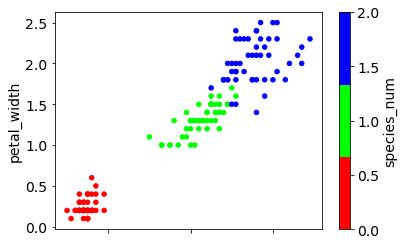

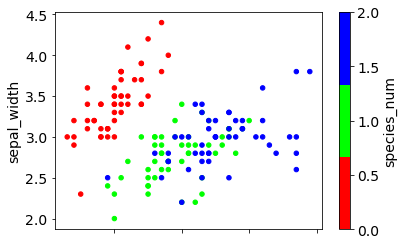

In [130]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

'pedal_width' is the better indicator of species based on the above plots.

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [131]:
# create feature matrix
X = iris.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create your target vector "y"
This will be the species type.

In [132]:
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [135]:
knn = KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [136]:
# use train test split on the data at 75/25 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, train_size = .75, random_state = 1)

# fit model with X_train and y_train
knn.fit(X_train, y_train)

# predict y from the X test data
y_pred = knn.predict(X_test)

# score the model 
knn.score(X,y)

1.0

### Create a Model With Five Neighbors. Did it Improve?

In [137]:
# make an instance with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, train_size = .75, random_state = 1)

# fit model with X_train and y_train
knn.fit(X_train, y_train)

#predict y from the X test data
y_pred_class = knn.predict(X_test)

#score the model
knn.score(X,y)

0.9666666666666667

It doesn't seem like it improved. The accuracy with 5 neighbors is 97% compared to 100%. 

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [138]:
scores = []

for k in range(1,10): # limit the data to 10 so to avoid showing the entire df
    # instantiate model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # train test split 75/25
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, train_size = .75, random_state = 1)
    
    # fit model with X_train and y_train
    knn.fit(X_train, y_train)

    # predict y from the X test data
    y_pred = knn.predict(X_test)
   
    # print predictions 
    print(knn.score(X,y,sample_weight=None))

1.0
0.98
0.96
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.98
0.9733333333333334


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [139]:
knn.predict_proba(X_test)[1:10, :]

array([[0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ]])

Returns probability predictions for each of the possible classes. Adding up to 1. 


## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [140]:
# First, format our data in a DataFrame

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [141]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):                   1.38e-321
Time:                        17:55:53   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [142]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(boston.data, columns=boston.feature_names), boston.target, random_state=123, test_size = 0.2)

df2 = X_train
df2['MEDV'] = y_train

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1059.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):                   5.73e-262
Time:                        17:55:55   Log-Likelihood:                         -1232.5
No. Observations:                 404   AIC:                                      2481.
Df Residuals:                     396   BIC:                                      2513.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             5.0429      0.233     21.634      0.000       4.585       5.501
LSTAT         -0.5992      0.053    -11.396      0.000      -0.703      -0.496
RAD            0.2098      0.072      2.917      0.004       0.068       0.351
TAX           -0.0183      0.004     -4.350      0.000      -0.027      -0.010
NOX            4.4659      3.510      1.272      0.204      -2.434      11.366
INDUS          0.1226      0.070      1.762      0.079      -0.014       0.259
CRIM          -0.0696      0.038     -1.827      0.068      -0.144       0.005
ZN             0.0242      0.014      1.757      0.080      -0.003       0.051
==============================================================================
Omnibus:                      156.081   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.344
Skew:                           1.683   Prob(JB):                    4.00e-139
Kurtosis:                       8.152   Cond. No.                     6.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 39.337945045250564
RMSE: 6.271996894550456


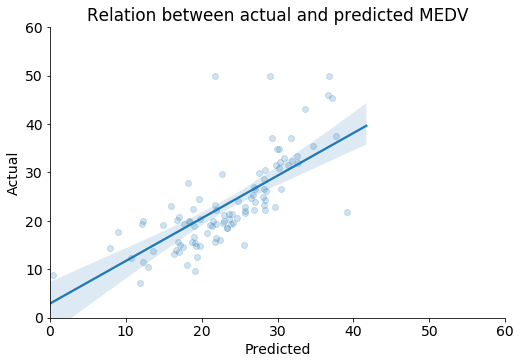

In [143]:
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
}

model = smf.ols(formula=formulas['case1'], data=df2)
result = model.fit()

display(result.summary())

from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, result.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test))))

sns.lmplot(x='Predicted', y='Actual', data=pd.DataFrame({'Actual': y_test, 'Predicted': result.predict(X_test)}), 
           aspect=1.5, scatter_kws={'alpha':0.2});
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Relation between actual and predicted MEDV');
plt.xlim(0, 60);
plt.ylim(0, 60);

Improved R2 to 95.5% and MSE to 39.337. 

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [144]:
# Check out variable relations
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

# had to call boston data again in order for pairplot to work for some reason...
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

boston = pd.concat([y,X], axis=1)

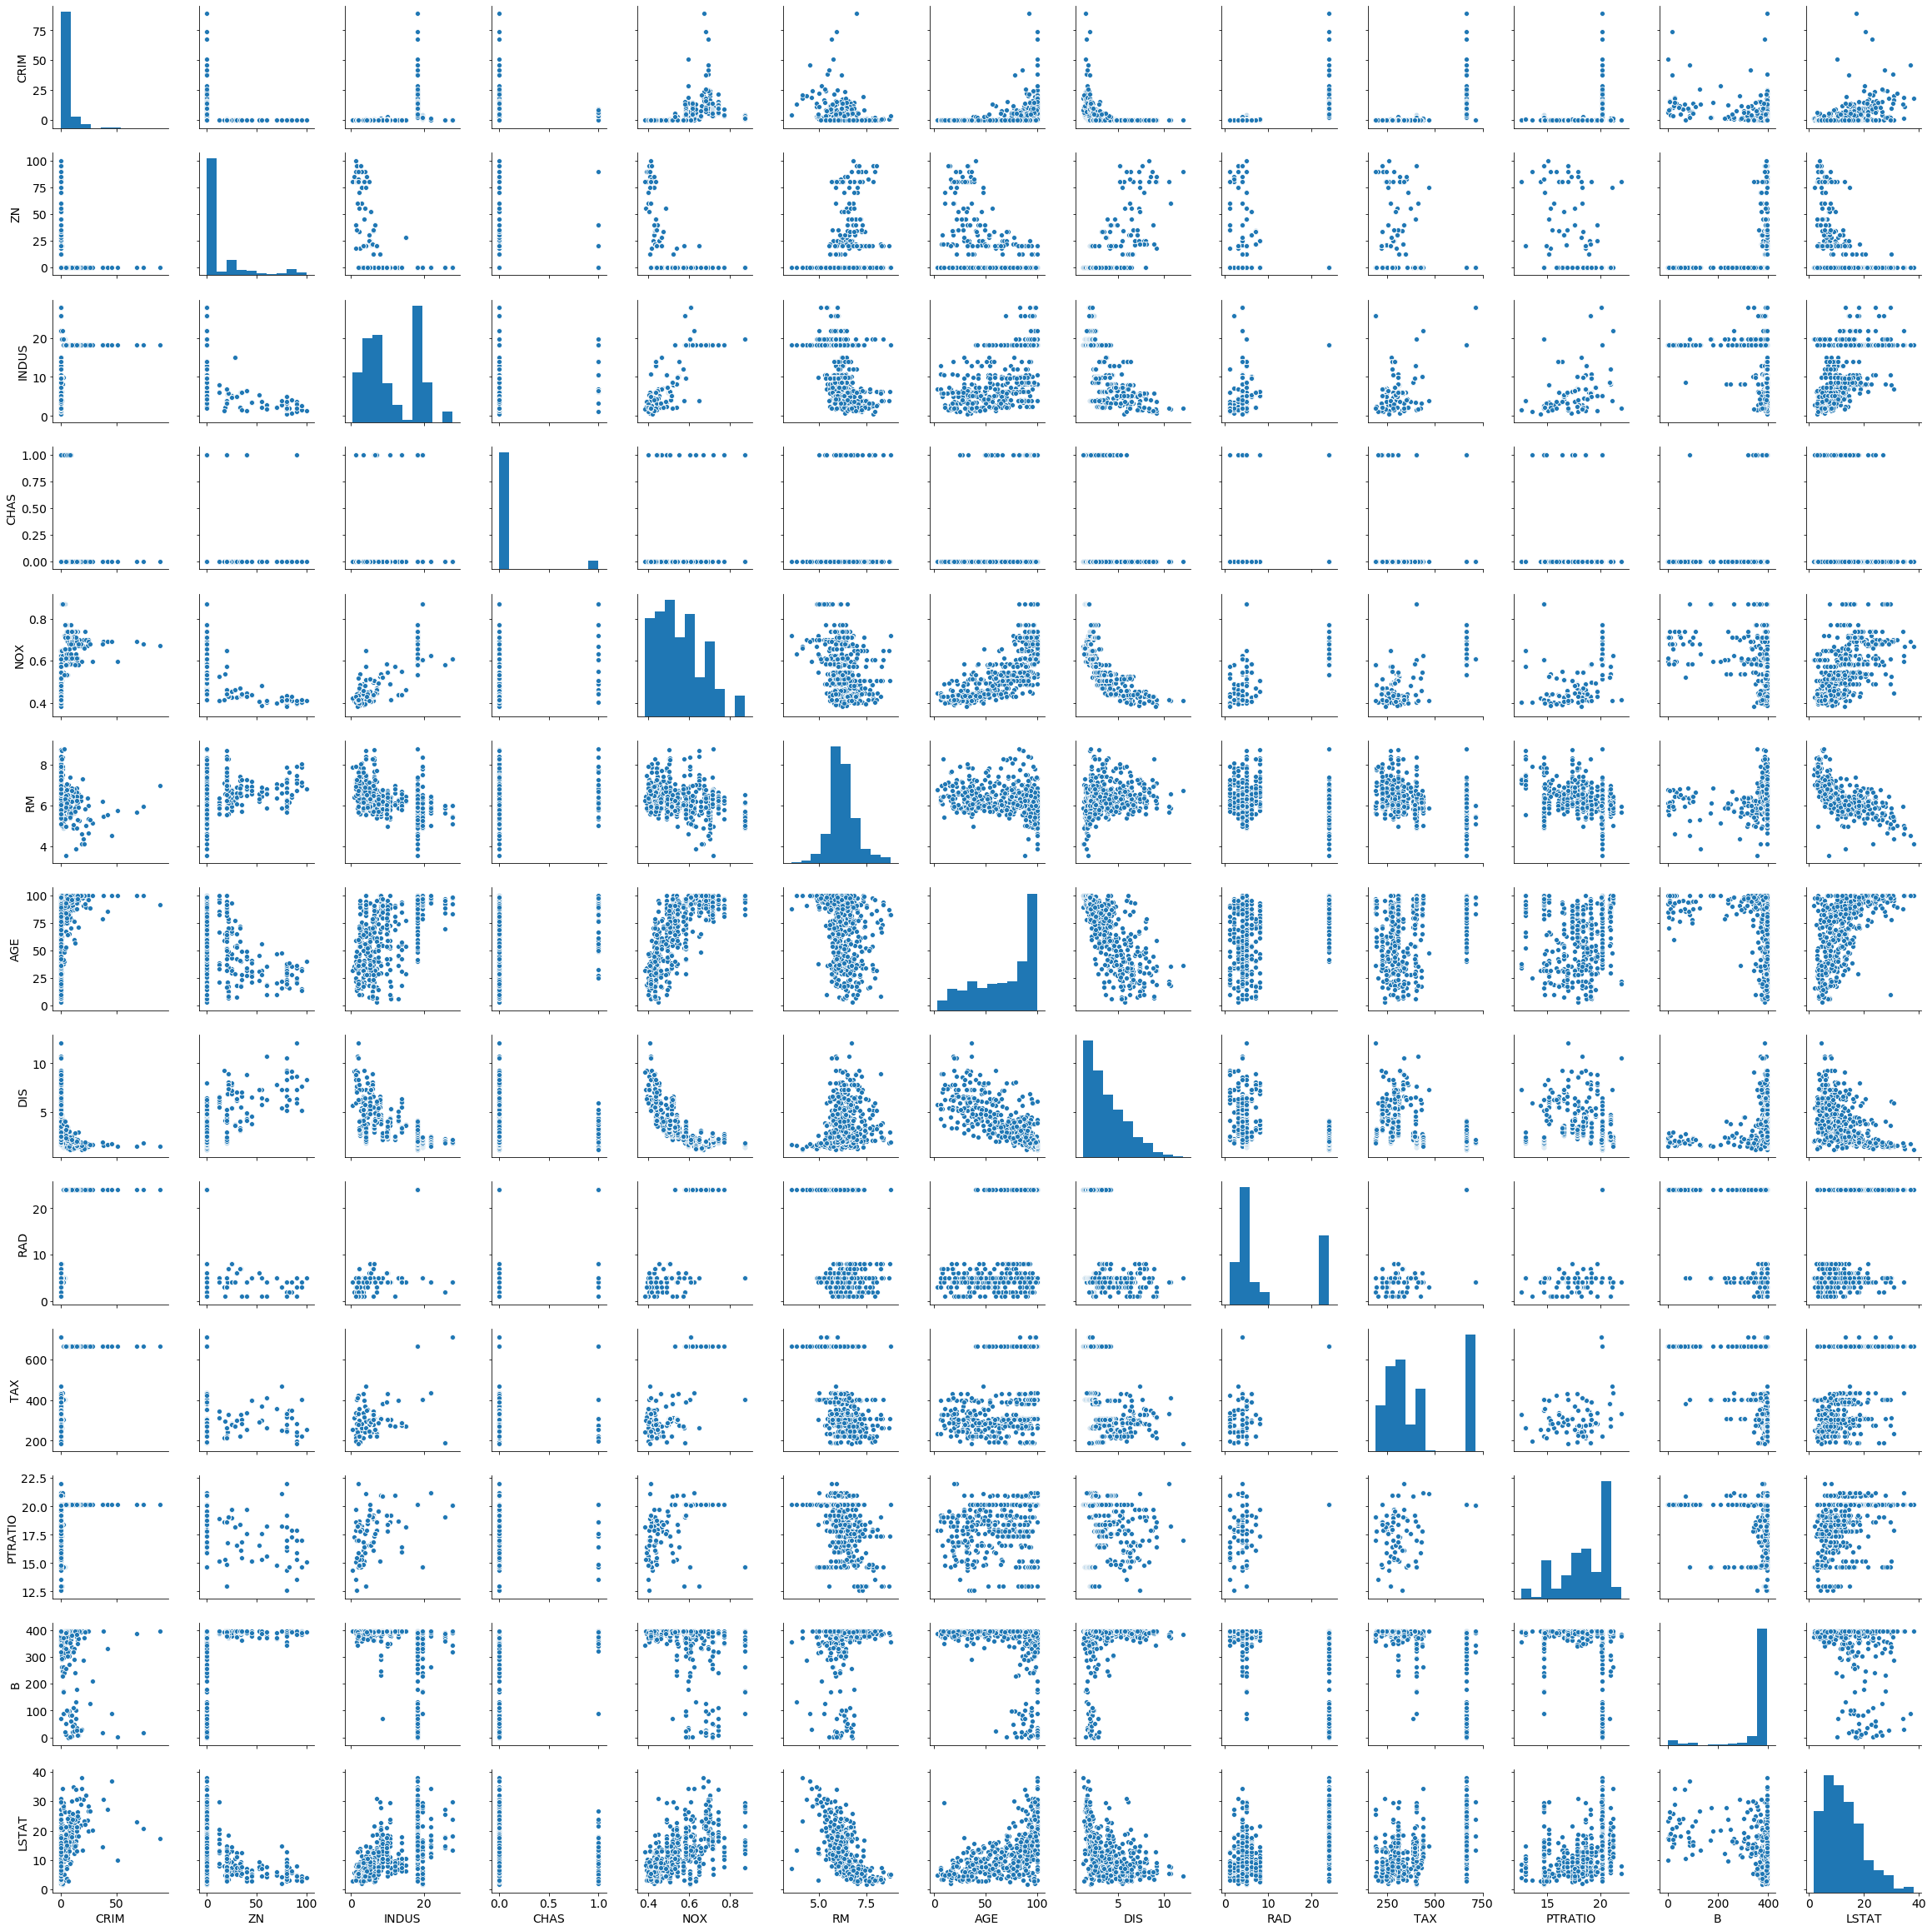

In [145]:
sns.pairplot(X);

In [146]:
# Check out Pearson scores

In [154]:
# print boston header of boston data
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [149]:
# call columns of boston data
boston.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [157]:
# calculate pearson scores
boston_corr_p = boston[[u'MEDV', u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS', u'RAD',
       u'TAX', u'PTRATIO', u'B', u'LSTAT']].corr(method='pearson')

print(boston_corr_p)

             MEDV      CRIM        ZN     INDUS      CHAS       NOX        RM  \
MEDV     1.000000 -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360   
CRIM    -0.388305  1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN       0.360445 -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS   -0.483725  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS     0.175260 -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX     -0.427321  0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM       0.695360 -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE     -0.376955  0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS      0.249929 -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD     -0.381626  0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX     -0.468536  0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO -0.507787  0.289946 

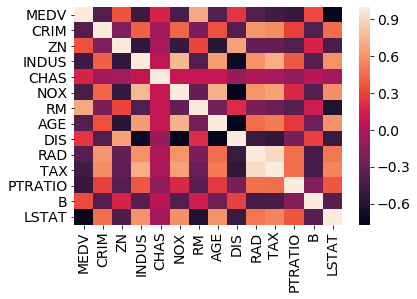

In [158]:
# visualize Pearson scores
sns.heatmap(boston_corr_p)